Acces ORBIS database through Bocconi Library: https://unibocconi.libguides.com/az.php?a=o and download data using this filtering:  
<img src="img/orbis_query_jan25.png" style="display: block; margin: 0 auto">  


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# orbis_raw.xlsx --> orbis.csv

Open the .xlxs files downloaded from Orbis, convert to single .csv and pivot.

In [74]:
df = pd.concat([
pd.read_excel('./data/orbis_raw_1_15000.xlsx', sheet_name='Results', index_col=0),
pd.read_excel('./data/orbis_raw_15001_32205.xlsx', sheet_name='Results', index_col=0)
], ignore_index=True)

df

,Company name Latin alphabet,Last avail. year,"US SIC, primary code(s)",BvD ID number,Operating profit (loss) [EBIT]\nm USD 2023,Operating profit (loss) [EBIT]\nm USD 2022,Operating profit (loss) [EBIT]\nm USD 2021,Operating profit (loss) [EBIT]\nm USD 2020,Operating profit (loss) [EBIT]\nm USD 2019,Operating profit (loss) [EBIT]\nm USD 2018,...,Total equity\nm USD 2022,Total equity\nm USD 2021,Total equity\nm USD 2020,Total equity\nm USD 2019,Total equity\nm USD 2018,Total equity\nm USD 2017,Operating profit (loss) [EBIT]\nm USD 2016,Total equity\nm USD 2016,Profit (loss) for the period [Net income]\nm USD 2016,Operating revenue (Turnover)\nm USD 2016
0,RELIANCE INDUSTRIES LIMITED,2023.0,2821.0,IN30074FI,13406.474177,12556.17806,10714.959644,7279.126272,8928.061972,9332.77221,...,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,5398.173213,n.a.,4611.604733,47364.223545
1,INDIAN OIL CORPORATION LIMITED,2023.0,2999.0,IN30417FI,7393.929282,3096.622578,4804.269095,4188.598768,1294.195574,4179.57728,...,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,5438.181788,n.a.,3061.369253,54917.975341
2,OIL & NATURAL GAS CORPORATION LIMITED,2023.0,1311.0,IN30764FI,9452.177076,7467.951131,7264.38502,3749.967639,4477.958524,9157.340929,...,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,3989.847488,n.a.,3161.368788,19566.919045
3,LIFE INSURANCE CORP. OF INDIA,2023.0,6311.0,INFEI1007236,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,...,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,344.199406,46343.89922
4,NaN,NaN,6331.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47303,DHANI STOCKS LIMITED,2022.0,7389.0,IN0000277403,n.a.,2.46245,1.714655,3.009944,-0.646328,4.520979,...,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,3.210566,n.a.,3.134619,3.585079
47304,KUHELI DEALCOM PVT LTD,2022.0,NaN,IN0007699791,n.a.,0.145643,0.115028,0.092577,0.044298,0.042548,...,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.
47305,ROOP RASAYAN INDUSTRIES PRIVATE LIMITED,2022.0,NaN,IN0006777308,n.a.,0.205846,0.328149,0.289799,0.238987,0.042345,...,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.
47306,MAGNUM LUBRICANTS (INDIA) PRIVATE LIMITED,2023.0,2999.0,IN0010842442,0.482779,0.533793,0.448032,0.146668,0.324224,0.280311,...,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,0.985613,n.a.,0.555504,13.211937


In [75]:
df.columns

Index(['Company name Latin alphabet', 'Last avail. year',
       'US SIC, primary code(s)', 'BvD ID number',
       'Operating profit (loss) [EBIT]\nm USD 2023',
       'Operating profit (loss) [EBIT]\nm USD 2022',
       'Operating profit (loss) [EBIT]\nm USD 2021',
       'Operating profit (loss) [EBIT]\nm USD 2020',
       'Operating profit (loss) [EBIT]\nm USD 2019',
       'Operating profit (loss) [EBIT]\nm USD 2018',
       'Operating profit (loss) [EBIT]\nm USD 2017',
       'Operating revenue (Turnover)\nm USD 2023',
       'Operating revenue (Turnover)\nm USD 2022',
       'Operating revenue (Turnover)\nm USD 2021',
       'Operating revenue (Turnover)\nm USD 2020',
       'Operating revenue (Turnover)\nm USD 2019',
       'Operating revenue (Turnover)\nm USD 2018',
       'Operating revenue (Turnover)\nm USD 2017',
       'Profit (loss) for the period [Net income]\nm USD 2023',
       'Profit (loss) for the period [Net income]\nm USD 2022',
       'Profit (loss) for the perio

Create a new year columns and convert columns accordingly  
Years from 2016 to 2023 included.
Yearly columns:
- R&D expenses / Operating revenue\nYEAR
- Acquisition of Business\nm USD YEAR
- Operating revenue (Turnover)\nm USD YEAR
- Operating profit (loss) [EBIT]\nm USD YEAR
- Profit (loss) for the period [Net income]\nm USD YEAR
- Total equity\nm USD YEAR

In [76]:
# Pivot values and variables columns

id_vars = ['Company name Latin alphabet', 'Last avail. year', 'BvD ID number', 'US SIC, primary code(s)']
df_melted = df.melt(id_vars=id_vars, var_name='MetricYear', value_name='Value')
df_melted['Year'] = df_melted['MetricYear'].str.extract(r'(\d{4})')
df_melted['Metric'] = df_melted['MetricYear'].str.replace(r'\n?\d{4}', '', regex=True).str.strip()
df_pivoted = df_melted.pivot_table(index=id_vars + ['Year'], columns='Metric', values='Value', aggfunc='first').reset_index()

# View
print(f'Unique BvD ID numbers: {df_pivoted['BvD ID number'].unique().shape[0]:,}')
display(df_pivoted)

# Save
df_pivoted.to_csv('./data/orbis.csv')

Unique BvD ID numbers: 29,390


Metric,Company name Latin alphabet,Last avail. year,BvD ID number,"US SIC, primary code(s)",Year,Operating profit (loss) [EBIT]\nm USD,Operating revenue (Turnover)\nm USD,Profit (loss) for the period [Net income]\nm USD,Total equity\nm USD
0,102 MOTHER CHILD SERVICES (UP),2022.0,IN0020654917,8361.0,2016,n.a.,n.a.,n.a.,n.a.
1,102 MOTHER CHILD SERVICES (UP),2022.0,IN0020654917,8361.0,2017,n.a.,n.a.,n.a.,n.a.
2,102 MOTHER CHILD SERVICES (UP),2022.0,IN0020654917,8361.0,2018,n.a.,n.a.,n.a.,n.a.
3,102 MOTHER CHILD SERVICES (UP),2022.0,IN0020654917,8361.0,2019,-9.163333,16.424728,-9.335146,n.a.
4,102 MOTHER CHILD SERVICES (UP),2022.0,IN0020654917,8361.0,2020,-7.820313,32.540672,-7.995061,n.a.
...,...,...,...,...,...,...,...,...,...
235115,ZYWIE VENTURES PRIVATE LIMITED,2022.0,IN0013035226,7389.0,2019,n.a.,n.a.,n.a.,n.a.
235116,ZYWIE VENTURES PRIVATE LIMITED,2022.0,IN0013035226,7389.0,2020,n.a.,n.a.,n.a.,n.a.
235117,ZYWIE VENTURES PRIVATE LIMITED,2022.0,IN0013035226,7389.0,2021,-8.415004,16.296693,-8.197583,n.a.
235118,ZYWIE VENTURES PRIVATE LIMITED,2022.0,IN0013035226,7389.0,2022,6.97544,23.723165,7.091839,n.a.


# Cleaning & Feature Extraction

In [269]:
df = pd.read_csv('./data/orbis.csv', index_col = 0, na_values='n.a.', low_memory=False)

# For faster access
df.rename(columns={
    'Company name Latin alphabet': 'Name',
    'US SIC, primary code(s)': 'SIC',
    'BvD ID number': 'BVD',
    'Operating profit (loss) [EBIT]\nm USD': 'EBIT',
    'Operating revenue (Turnover)\nm USD': 'Turnover',
    'Profit (loss) for the period [Net income]\nm USD': 'Profit',
    'Total equity\nm USD': 'Equity',
}, inplace=True)

# Reduce for analysis
df = df[['Name', 'SIC', 'BVD', 'Year', 'EBIT', 'Turnover', 'Profit', 'Equity']]
df

,Name,SIC,BVD,Year,EBIT,Turnover,Profit,Equity
0,102 MOTHER CHILD SERVICES (UP),8361.0,IN0020654917,2016,NaN,NaN,NaN,NaN
1,102 MOTHER CHILD SERVICES (UP),8361.0,IN0020654917,2017,NaN,NaN,NaN,NaN
2,102 MOTHER CHILD SERVICES (UP),8361.0,IN0020654917,2018,NaN,NaN,NaN,NaN
3,102 MOTHER CHILD SERVICES (UP),8361.0,IN0020654917,2019,-9.163333,16.424728,-9.335146,NaN
4,102 MOTHER CHILD SERVICES (UP),8361.0,IN0020654917,2020,-7.820313,32.540672,-7.995061,NaN
...,...,...,...,...,...,...,...,...
235115,ZYWIE VENTURES PRIVATE LIMITED,7389.0,IN0013035226,2019,NaN,NaN,NaN,NaN
235116,ZYWIE VENTURES PRIVATE LIMITED,7389.0,IN0013035226,2020,NaN,NaN,NaN,NaN
235117,ZYWIE VENTURES PRIVATE LIMITED,7389.0,IN0013035226,2021,-8.415004,16.296693,-8.197583,NaN
235118,ZYWIE VENTURES PRIVATE LIMITED,7389.0,IN0013035226,2022,6.975440,23.723165,7.091839,NaN


## Null Values

The equity feature has >90% of `NaN`: drop the entire column and work on the rest.

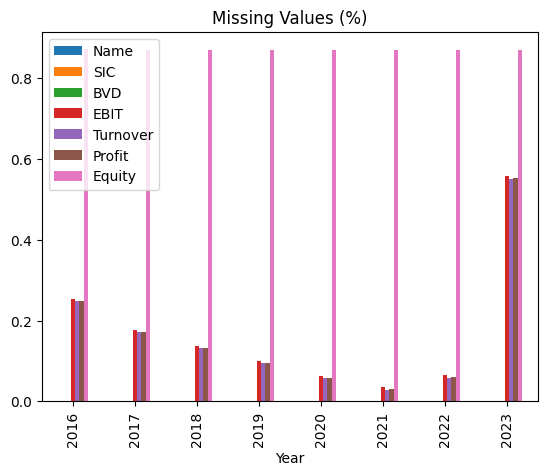

In [270]:
# Visualize Nulls
temp = df.set_index('Year').copy()
temp = temp.isna().astype(float).groupby(temp.index).sum()
temp = temp / (df.shape[0] / 7) # number of observations per year
temp['Year'] = temp.index
temp.plot(x='Year', kind='bar', title='Missing Values (%)')
plt.show()

In [271]:
# Drop the entire column equity if NAs
df = df.drop(columns=['Equity'])          # too many NAs
print(f'Unique companies before: {df.BVD.unique().shape[0]:,}')

# Drop all the companies with missing years
df = df.dropna().reset_index(drop=True)

# Keep only companies with 8 complete years of data
df = df.loc[df.BVD.isin(df.BVD.value_counts()[df.BVD.value_counts() == 8].index)]                                            

print(f'After: {df.BVD.unique().shape[0]:,}')

df.head()

Unique companies before: 29,390
After: 8,360


,Name,SIC,BVD,Year,EBIT,Turnover,Profit
12,20 MICRONS LTD,5052.0,IN33942FI,2016,7.157711,60.953104,2.376069
13,20 MICRONS LTD,5052.0,IN33942FI,2017,7.920519,65.763951,2.910010
14,20 MICRONS LTD,5052.0,IN33942FI,2018,8.517130,69.345117,3.599282
15,20 MICRONS LTD,5052.0,IN33942FI,2019,7.185030,70.215105,3.199153
16,20 MICRONS LTD,5052.0,IN33942FI,2020,6.452948,65.904370,3.125242


## Features Extraction

To conduct the analysis, I need to compute the following 3 metrics:  
- Revenue Growth (% increase compared to previous year)
- Operating Margin (EBIT / Turnover)
- RoE (Profit / Equity)  

However, due to the missing values, I restrict to Revenue Growth (RG) and Operating Margin (OM).

In [272]:
# Operating Margin
df['OM'] = df.EBIT / df.Turnover

# Revenue Growth
df = df.sort_values(by=['Name', 'Year'])
df['RG'] = df.groupby('Name')['Turnover'].apply(lambda x: x.pct_change(fill_method = None)).values

# Set infs to null (companies with turnover == 0)
df = df.replace(np.inf, np.nan)
df = df.replace(-np.inf, np.nan)

print(df.shape)
df.head()

(66880, 9)


,Name,SIC,BVD,Year,EBIT,Turnover,Profit,OM,RG
12,20 MICRONS LTD,5052.0,IN33942FI,2016,7.157711,60.953104,2.376069,0.117430,NaN
13,20 MICRONS LTD,5052.0,IN33942FI,2017,7.920519,65.763951,2.910010,0.120439,0.078927
14,20 MICRONS LTD,5052.0,IN33942FI,2018,8.517130,69.345117,3.599282,0.122822,0.054455
15,20 MICRONS LTD,5052.0,IN33942FI,2019,7.185030,70.215105,3.199153,0.102329,0.012546
16,20 MICRONS LTD,5052.0,IN33942FI,2020,6.452948,65.904370,3.125242,0.097914,-0.061393


In [273]:
print(f'Unique companies before: {df.BVD.unique().shape[0]:,}')

# Drop new NAs generated (from OM and RG computation)
df = df.dropna(inplace=False)

# Keep only years 17-18-19-20-21-22-23
df = df[df.Year.isin([2017, 2018, 2019, 2020, 2021, 2022, 2023])]
df.Year.value_counts()

# Keep only companies with all 7 years of complete data
df = df[df.BVD.isin(df.BVD.value_counts()[df.BVD.value_counts() == 7].index)]

print(f'Unique companies afater: {df.BVD.unique().shape[0]:,}')

Unique companies before: 8,360
Unique companies afater: 8,124


Retrieve the major industrial group from the first 2 digits of the SIC code

In [274]:
def lookup(x):
    if 1 <= x <= 9:
        return 'Agriculture, Forestry, and Fishing'
    elif 10 <= x <= 14:
        return 'Mining'
    elif 15 <= x <= 17:
        return 'Construction'
    elif 20 <= x <= 39:
        return 'Manufacturing'
    elif 40 <= x <= 49:
        return 'Transportation, Communications, Electric, Gas, and Sanitary Services'
    elif 50 <= x <= 51:
        return 'Wholesale Trade'
    elif 52 <= x <= 59:
        return 'Retail Trade'
    elif 60 <= x <= 67:
        return 'Finance, Insurance, and Real Estate'
    elif 70 <= x <= 89:
        return 'Services'
    elif 90 <= x <= 99:
        return 'Public Administration'
    else:
        return 'Unknown'

,Name,SIC,BVD,Year,EBIT,Turnover,Profit,OM,RG,Industry
12210,APARNA AGENCY PRIVATE LIMITED,5085.0,IN0000998013,2019,0.194174,21.139284,0.157722,0.009185,-0.019427,Wholesale Trade
6551,AKASA FINANCE LIMITED,6153.0,IN0007267719,2022,1.858887,5.738577,0.004130,0.323928,0.097690,"Finance, Insurance, and Real Estate"
50354,FEDERAL-MOGUL GOETZE (INDIA) LIMITED,5531.0,IN30576FI,2021,10.989261,177.276169,7.128726,0.061990,0.186253,Retail Trade
19427,B.D STEELS PRIVATE LIMITED,3999.0,IN0013394355,2022,0.504118,43.385875,0.146515,0.011619,-0.060631,Manufacturing
138357,SAFE AND SECURE ONLINE MARKETING PRIVATE LIMITED,5999.0,IN0013359836,2017,8.289977,87.534849,5.174763,0.094705,0.800339,Retail Trade


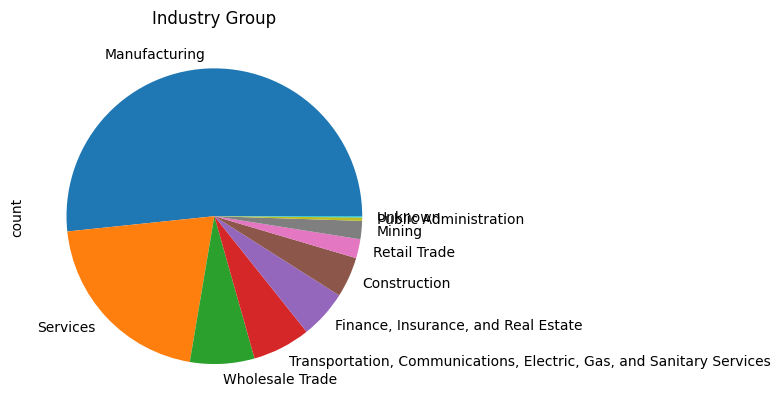

In [275]:
df['Industry'] = df.SIC.astype(str).str[:2].astype(int).apply(lookup)
display(df.sample(5))
df.Industry.value_counts().plot(kind='pie', title='Industry Group')
plt.show()

## Outliers

Visualize outliers

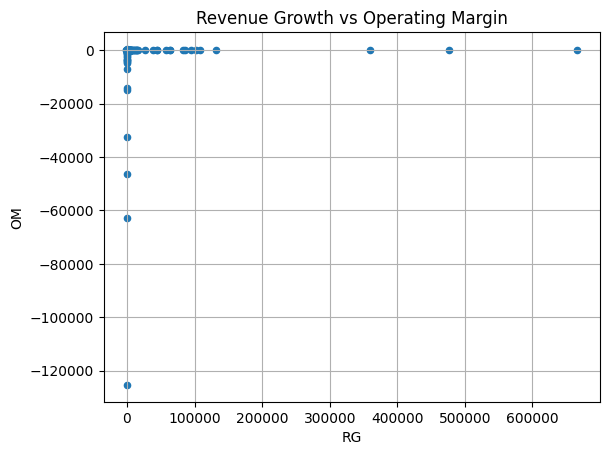

In [276]:
df.plot(x = 'RG', y = 'OM', kind='scatter', title='Revenue Growth vs Operating Margin')
plt.grid()

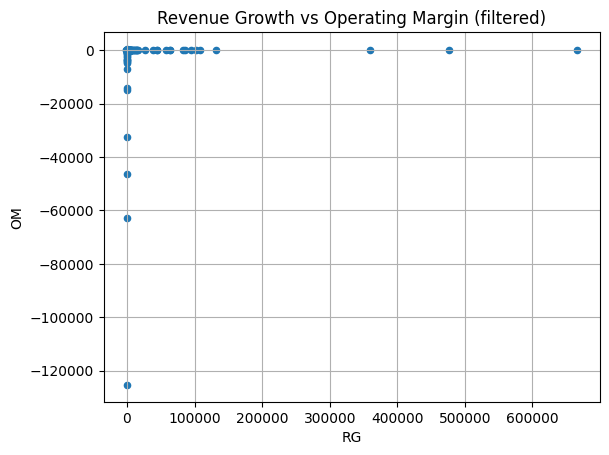

In [277]:
# Drop outliers (not only the entry, but all records for the BVD)
MAX_RG = 0.5e7
MIN_OM = -1e6
df = df[~df.BVD.isin(df[(df.RG > MAX_RG) | (df.OM < MIN_OM)].BVD)]
df.plot(x = 'RG', y = 'OM', kind='scatter', title='Revenue Growth vs Operating Margin (filtered)')
plt.grid()

In [279]:
df.to_csv('./data/orbis_final.csv')

# Resilient Cos Analysis

1. Compute the industry average before and after 2020
2. Identify companies performing above average for both metrics
3. Split into disjoint subsets according to when they are breakway
   1. RESILIENT -> before && after
   2. NON-RESILIENT -> before && ~after
   3. NEW-BREAKAWYS -> ~before && after

In [326]:
breakaway = {}

for time in ['before', 'after']:
    
    # Restrict dataset
    if time == 'before':
        temp = df.loc[df.Year < 2020].copy()
    else:
        temp = df.loc[df.Year > 2020].copy()
    
    # Compute industry average and outer join to the dataset
    industry_avg = temp.groupby(['Industry', 'Year'], as_index=False)[['OM', 'RG']].median()
    industry_avg.to_csv(f'data/industry_median_{time}_2020.csv')
    temp = temp.merge(industry_avg, on=['Industry', 'Year'], suffixes=('', '_ind_avg'))
    
    # Flag if above industry average
    temp['OM_above'] = (temp.OM > temp.OM_ind_avg).astype(int)
    temp['RG_above'] = (temp.RG > temp.RG_ind_avg).astype(int)
    
    # Breakaway iff above industry avg for all years considered and for both metrics
    is_breakaway = temp.groupby('BVD')[['OM_above', 'RG_above']].all().all(axis=1).reset_index().rename(columns={0: f'is_breakaway_{time}'})
    temp = temp.merge(is_breakaway, on='BVD', suffixes=('', ''))
    temp = temp[temp[f'is_breakaway_{time}']].reset_index(drop=True)

    # Store all dataframe
    temp.to_csv(f'./data/breakaway_{time}_2020_all_years.csv', index=False)
    
    # Store list of unique companies by restricting to 2022
    temp = temp[['Name', 'SIC', 'BVD']].drop_duplicates()
    temp.to_csv(f'./data/breakaway_{time}_2020.csv', index=False)
    
    # Save for later
    breakaway[time] = temp.copy()

In [327]:
tmp = df.copy()

tmp.loc[:, 'is_breakaway_before'] = tmp.BVD.isin(breakaway['before'].BVD).to_list()
tmp.loc[:, 'is_breakaway_after'] = tmp.BVD.isin(breakaway['after'].BVD).to_list()

# RESILIENT
resilient = tmp.loc[tmp.is_breakaway_before & tmp.is_breakaway_after, ['Name', 'SIC', 'BVD', 'Industry', 'Year', 'OM', 'RG']]
resilient.to_csv('./data/resilient_all_metrics.csv', index=False)                                                   # with metrics
resilient.drop(columns=['Year', 'OM', 'RG']).drop_duplicates().to_csv('./data/resilient.csv', index=False)      # inly name and industry
print(f'Resilient are {resilient.drop(columns=['Year', 'OM', 'RG']).drop_duplicates().shape[0]}')

# NON-RESILIENT
non_resilient = tmp.loc[tmp.is_breakaway_before & ~tmp.is_breakaway_after, ['Name', 'SIC', 'BVD', 'Industry', 'Year', 'OM', 'RG']].drop_duplicates()
non_resilient.to_csv('./data/non_resilient_all_metrics.csv', index=False)
non_resilient.drop(columns=['Year', 'OM', 'RG']).drop_duplicates().to_csv('./data/non_resilient.csv', index=False)
print(f'Non-resilient are {non_resilient.drop(columns=['Year', 'OM', 'RG']).drop_duplicates().shape[0]}')

# NEW-BREAKAWAY
new_breakaway = tmp.loc[~tmp.is_breakaway_before & tmp.is_breakaway_after, ['Name', 'SIC', 'BVD', 'Industry', 'Year', 'OM', 'RG']].drop_duplicates()
new_breakaway.to_csv('./data/new_breakaway_all_metrics.csv', index=False)
new_breakaway.drop(columns=['Year', 'OM', 'RG']).drop_duplicates().to_csv('./data/new_breakaway.csv', index=False)
print(f'New breakaway are {new_breakaway.drop(columns=['Year', 'OM', 'RG']).drop_duplicates().shape[0]}')

Resilient are 84
Non-resilient are 428
New breakaway are 392


In [335]:
# top 20 by OM, RG

for metric in ['OM', 'RG']:
    
    resilient.groupby(by = ['BVD', 'Name', 'SIC', 'Industry'], as_index = False)[f'{metric}'].mean().sort_values(by = f'{metric}', ascending = False).to_csv(f'./data/resilient_by_{metric}.csv')
    
    non_resilient.loc[non_resilient.Year < 2020].groupby(by = ['BVD', 'Name', 'SIC', 'Industry'], as_index = False)[f'{metric}'].mean().sort_values(by = f'{metric}', ascending = False).to_csv(f'./data/non_resilient_by_{metric}.csv')
    
    new_breakaway.loc[new_breakaway.Year > 2020].groupby(by = ['BVD', 'Name', 'SIC', 'Industry'], as_index = False)[f'{metric}'].mean().sort_values(by = f'{metric}', ascending = False).to_csv(f'./data/new_breakaway_by_{metric}.csv')
